In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

In [ ]:
df = pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

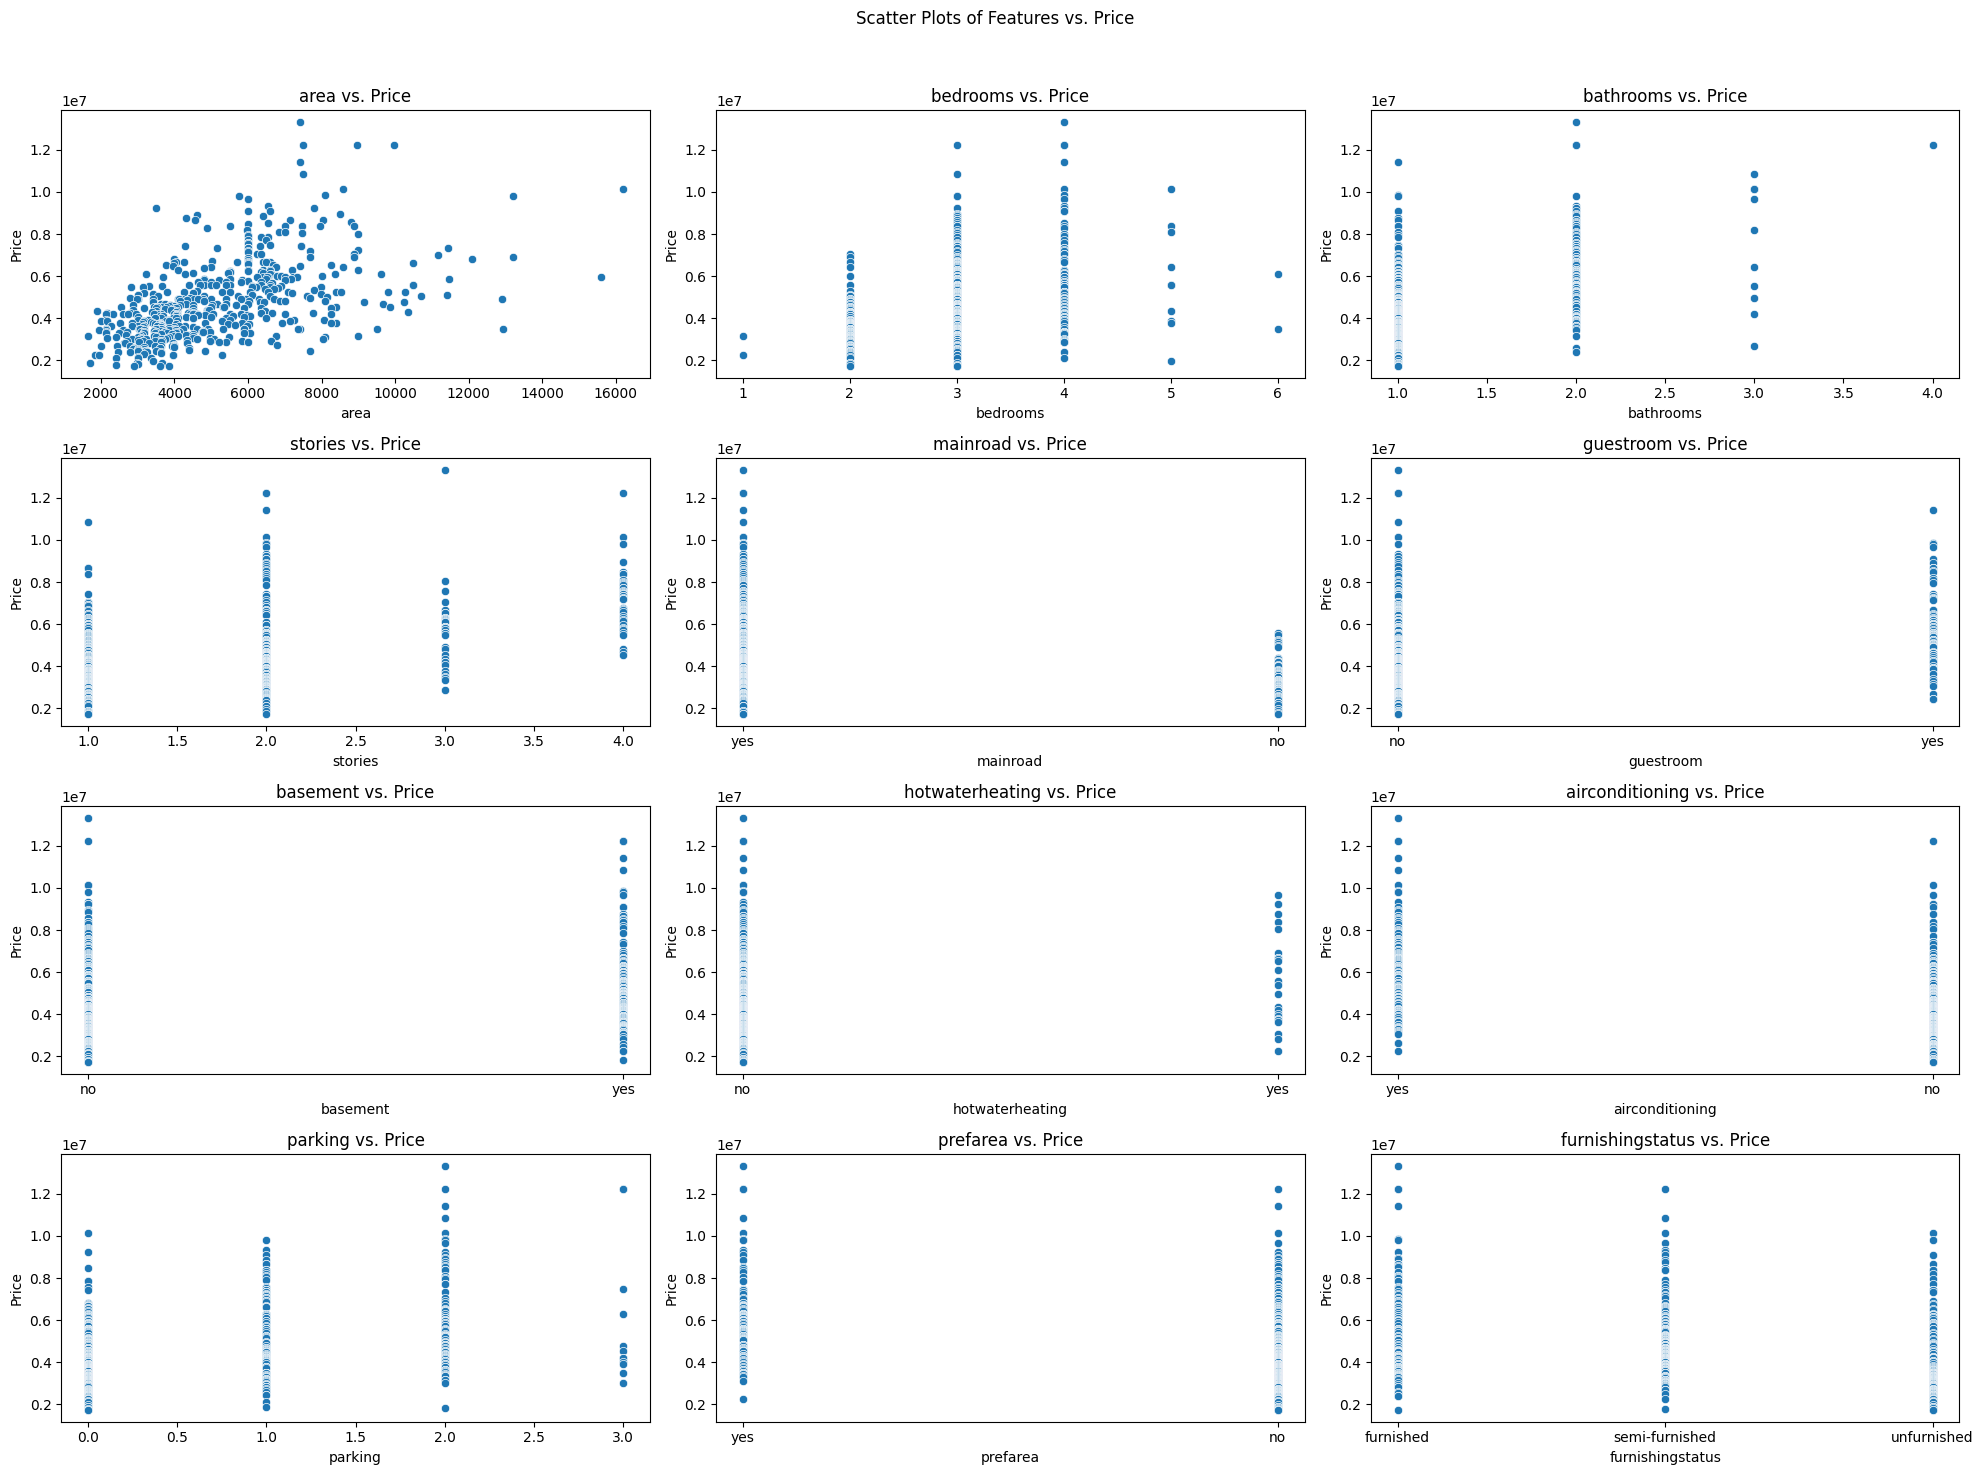

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# List of features to plot against the target variable 'price'
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking',
            'prefarea', 'furnishingstatus']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
fig.suptitle('Scatter Plots of Features vs. Price')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to include the main title
plt.show()


In [ ]:
columns_to_convert = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[columns_to_convert] = df[columns_to_convert].replace({'yes': 1, 'no': 0})


In [ ]:
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1})

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


In [ ]:
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Testing Labels:\n", y_test)

Training Features:
          area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   1.494845         3          2        4         1          0         0   
93   1.907216         3          2        1         1          0         1   
335  0.744330         2          1        1         1          0         1   
412  0.329897         3          1        2         1          0         1   
471  0.721649         3          1        2         1          0         0   
..        ...       ...        ...      ...       ...        ...       ...   
71   1.494845         4          2        4         1          0         0   
106  1.305842         4          2        1         1          0         1   
270  0.979381         3          2        3         1          0         0   
435  0.821306         2          1        1         1          0         0   
102  1.323024         3          2        4         1          1         0   

     hotwaterheating  airconditioning  park

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
X_scaled_train

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  2.70998729,
        -0.55262032,  0.07931697],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.53897197,
        -0.55262032,  1.40940148],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032, -1.25076755],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [ ]:
X_pca_train

array([[ 2.28385659,  2.31436152],
       [ 2.14370484, -0.37410387],
       [ 0.38063067, -1.27041753],
       [-0.71262452, -1.07474689],
       [-1.439305  ,  0.7345409 ],
       [-0.47957845, -0.42292859],
       [-1.42282945,  0.72851266],
       [-2.34860446,  0.69620286],
       [-2.66098094,  0.81049831],
       [-1.05391427, -0.04891738],
       [-1.60047027,  0.6622479 ],
       [-1.61414059, -0.48866075],
       [ 0.56961034, -0.29963045],
       [-0.71682641, -0.33612192],
       [-0.50433687,  0.38383952],
       [ 0.3945559 , -0.95258619],
       [-2.419098  ,  0.76346042],
       [ 0.98624563,  0.46149733],
       [-1.96175847,  0.55465976],
       [ 3.14812447,  0.1268401 ],
       [ 2.40119951, -1.66419669],
       [-1.19247939,  0.68569453],
       [ 0.31335296,  1.33036252],
       [ 2.41505558, -2.23179132],
       [ 1.58597964,  2.057983  ],
       [-1.45578056,  0.74056914],
       [-3.05264053,  0.35054272],
       [-1.38672044,  0.07285309],
       [ 0.50308414,

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,3
93,7200,3,2,1,1,0,1,0,1,3,0,2
335,3816,2,1,1,1,0,1,0,1,2,0,3
412,2610,3,1,2,1,0,1,0,0,0,1,1
471,3750,3,1,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,1
106,5450,4,2,1,1,0,1,0,1,0,1,2
270,4500,3,2,3,1,0,0,1,0,1,0,3
435,4040,2,1,1,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
X_scaled_train

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  2.70998729,
        -0.55262032,  0.07931697],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.53897197,
        -0.55262032,  1.40940148],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  1.40940148],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.80305867,
        -0.55262032, -1.25076755],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  0.36795665,
        -0.55262032,  0.07931697]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_scaled_train)
X_pca_test = pca.transform(X_scaled_test)

In [ ]:
X_pca_train


array([[ 2.28385659,  2.31436152],
       [ 2.14370484, -0.37410387],
       [ 0.38063067, -1.27041753],
       [-0.71262452, -1.07474689],
       [-1.439305  ,  0.7345409 ],
       [-0.47957845, -0.42292859],
       [-1.42282945,  0.72851266],
       [-2.34860446,  0.69620286],
       [-2.66098094,  0.81049831],
       [-1.05391427, -0.04891738],
       [-1.60047027,  0.6622479 ],
       [-1.61414059, -0.48866075],
       [ 0.56961034, -0.29963045],
       [-0.71682641, -0.33612192],
       [-0.50433687,  0.38383952],
       [ 0.3945559 , -0.95258619],
       [-2.419098  ,  0.76346042],
       [ 0.98624563,  0.46149733],
       [-1.96175847,  0.55465976],
       [ 3.14812447,  0.1268401 ],
       [ 2.40119951, -1.66419669],
       [-1.19247939,  0.68569453],
       [ 0.31335296,  1.33036252],
       [ 2.41505558, -2.23179132],
       [ 1.58597964,  2.057983  ],
       [-1.45578056,  0.74056914],
       [-3.05264053,  0.35054272],
       [-1.38672044,  0.07285309],
       [ 0.50308414,

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
reg = LogisticRegression()


reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)




Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

     1750000       0.00      0.00      0.00         1
     1820000       0.00      0.00      0.00         1
     1890000       0.00      0.00      0.00         2
     2100000       0.00      0.00      0.00         1
     2233000       0.00      0.00      0.00         1
     2275000       0.00      0.00      0.00         1
     2380000       0.00      0.00      0.00         1
     2450000       0.00      0.00      0.00         2
     2520000       0.00      0.00      0.00         1
     2653000       0.00      0.00      0.00         0
     2660000       0.00      0.00      0.00         4
     2800000       0.00      0.00      0.00         1
     2870000       0.00      0.00      0.00         1
     2940000       0.00      0.00      0.00         2
     3003000       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

In [ ]:
reg.score(X_test, y_test)

0.009174311926605505

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lreg.score( X_test, y_test)

0.6494754192267792

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lreg = LinearRegression()
lreg.fit(X_pca_train, y_train)

LinearRegression()

In [ ]:
lreg.score(X_pca_test,y_test)

-639863.4172451276

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your data is in a DataFrame `df` with target column 'target'
# df = pd.read_csv('your_dataset.csv')

# For demonstration purposes, let's create a sample dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")




Mean Absolute Error (MAE): 979679.6912959901
Mean Squared Error (MSE): 1771751116594.035
Root Mean Squared Error (RMSE): 1331071.4167895105
R-squared (R²): 0.6494754192267804


In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Initialize and train the Lasso regression model (L1 regularization)
lasso_model = Lasso(alpha=10)  # Set the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

# Initialize and train the Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=0.01)  # Set the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate evaluation metrics for Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R-squared (R²): {r2_lasso}")
print("\nRidge Regression:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared (R²): {r2_ridge}")


Lasso Regression:
Mean Absolute Error (MAE): 979690.0860320368
Mean Squared Error (MSE): 1771786817649.953
Root Mean Squared Error (RMSE): 1331084.827368246
R-squared (R²): 0.6494683561028791

Ridge Regression:
Mean Absolute Error (MAE): 979683.5586107585
Mean Squared Error (MSE): 1771775773785.7188
Root Mean Squared Error (RMSE): 1331080.678916841
R-squared (R²): 0.6494705410293309


In [ ]:
lasso_model.score(X_test, y_test)

0.6494683561028791

In [ ]:
ridge_model.score(X_test, y_test)

0.6494705410293309

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and train the ElasticNet regression model
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.1)  # Set alpha and l1_ratio parameters
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set for ElasticNet model
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Calculate evaluation metrics for ElasticNet model
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet Regression:")
print(f"Mean Absolute Error (MAE): {mae_elasticnet}")
print(f"Mean Squared Error (MSE): {mse_elasticnet}")
print(f"Root Mean Squared Error (RMSE): {rmse_elasticnet}")
print(f"R-squared (R²): {r2_elasticnet}")


ElasticNet Regression:
Mean Absolute Error (MAE): 981232.118807399
Mean Squared Error (MSE): 1781586028304.9011
Root Mean Squared Error (RMSE): 1334760.6633044372
R-squared (R²): 0.6475296728563646


In [ ]:
elasticnet_model.score(X_test, y_test)

0.6475296728563646

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
svm_classifier = SVC(kernel='linear', C=20, gamma=42, random_state=100)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.027522935779816515


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(penalty='l1', dual=False, max_iter=10000))
])
param_grid_l1 = {
    'linear_svc__C': [10,100,200]
}

clf_l1 = GridSearchCV(pipeline, param_grid_l1, cv=5, return_train_score=False)

clf_l1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the num

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear_svc',
                                        LinearSVC(dual=False, max_iter=10000,
                                                  penalty='l1'))]),
             param_grid={'linear_svc__C': [10, 100, 200]})

In [ ]:
y_pred = clf_l1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1343682.110091743
Mean Squared Error (MSE): 3423630520344.0366
Root Mean Squared Error (RMSE): 1850305.5208111003
R-squared (R²): 0.3226663487742184


In [ ]:
r2

0.3226663487742184

In [ ]:
from sklearn.linear_model import ElasticNet
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
elastic_net.fit(X_train_scaled, y_train)
elastic_net.score(X_test_scaled, y_test)

-0.004040876302431329

In [ ]:
y_pred = elastic_net.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.6569733187442134
Mean Squared Error (MSE): 0.6326277249389785
Root Mean Squared Error (RMSE): 0.7953789819570155
R-squared (R²): -0.004040876302431329


In [ ]:
reg.score(X_test, y_test)

0.3486238532110092

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
reg.score(X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

0.03669724770642202

In [ ]:
svm.score(X_scaled_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
forest2=RandomForestClassifier(n_estimators=10, criterion='gini',
max_depth=None,min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features='auto',
max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
random_state=None, verbose=0, warm_start=False,class_weight=None)
forest2.fit(X_train, y_train)
forest2.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.455

In [ ]:
forest.score(X_test, y_test)
#

0.6168698622872839

In [ ]:
from sklearn.model_selection import GridSearchCV
forest2 = RandomForestRegressor()
param_grid = {
    'n_estimators': [5, 100, 200],
    'max_depth': [10, 15, 20]}

grid_search = GridSearchCV(forest2, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [5, 100, 200]})

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n_train_0 = (y_train ==
n_train_1 = (y_train == 1).sum()

# Count the number of samples for each class in the testing set
n_test_0 = (y_test == 0).sum()
n_test_1 = (y_test == 1).sum()

# Calculate the total number of samples in the training and testing sets
n_train = len(y_train)
n_test = len(y_test)

# Calculate the probabilities of predicting class 1 for the training and testing sets
y_proba_train = np.ones(n_train)
y_proba_test = np.ones(n_test)

# Predict class labels based on the probabilities (threshold of 0.5)
y_pred_train = y_proba_train > 0.5
y_pred_test = y_proba_test > 0.5

# Print accuracy scores and confusion matrices for training and testing sets
print("Training Set:")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train)}")
cf_mat_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(cf_mat_train)
print(f"Class 0 Accuracy: {cf_mat_train[0][0] / n_train_0}")
print(f"Class 1 Accuracy: {cf_mat_train[1][1] / n_train_1}")

print("\nTesting Set:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test)}")
cf_mat_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cf_mat_test)
print(f"Class 0 Accuracy: {cf_mat_test[0][0] / n_test_0}")
print(f"Class 1 Accuracy: {cf_mat_test[1][1] / n_test_1}")


Training Set:
Accuracy Score: 0.0
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Class 0 Accuracy: nan
Class 1 Accuracy: nan

Testing Set:
Accuracy Score: 0.0
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Class 0 Accuracy: nan
Class 1 Accuracy: nan


<ipython-input-146-6fd0dcc5d86a>:30: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Class 0 Accuracy: {cf_mat_train[0][0] / n_train_0}")
<ipython-input-146-6fd0dcc5d86a>:31: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Class 1 Accuracy: {cf_mat_train[1][1] / n_train_1}")
<ipython-input-146-6fd0dcc5d86a>:38: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Class 0 Accuracy: {cf_mat_test[0][0] / n_test_0}")
<ipython-input-146-6fd0dcc5d86a>:39: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Class 1 Accuracy: {cf_mat_test[1][1] / n_test_1}")


<ipython-input-148-576a29b6d28e>:9: RuntimeWarning: invalid value encountered in scalar divide
  cf_mat_train[0][0] / n_train_0,
<ipython-input-148-576a29b6d28e>:10: RuntimeWarning: invalid value encountered in scalar divide
  cf_mat_train[1][1] / n_train_1]
<ipython-input-148-576a29b6d28e>:13: RuntimeWarning: invalid value encountered in scalar divide
  cf_mat_test[0][0] / n_test_0,
<ipython-input-148-576a29b6d28e>:14: RuntimeWarning: invalid value encountered in scalar divide
  cf_mat_test[1][1] / n_test_1]


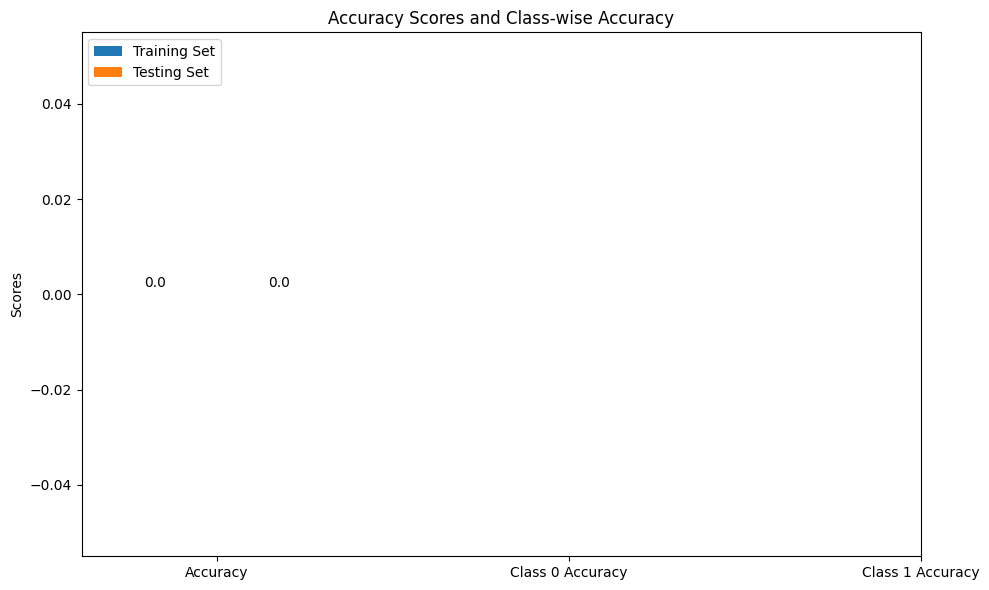

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define labels for the bar plot
labels = ['Accuracy', 'Class 0 Accuracy', 'Class 1 Accuracy']

# Define values for training and testing sets
train_values = [accuracy_score(y_train, y_pred_train),
                cf_mat_train[0][0] / n_train_0,
                cf_mat_train[1][1] / n_train_1]

test_values = [accuracy_score(y_test, y_pred_test),
               cf_mat_test[0][0] / n_test_0,
               cf_mat_test[1][1] / n_test_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting the bars for training and testing sets
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Training Set')
rects2 = ax.bar(x + width/2, test_values, width, label='Testing Set')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Accuracy Scores and Class-wise Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding the text values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
best_forest =grid_search.best_estimator_
best_forest.score(X_test, y_test)

0.6207258638827977

In [ ]:
train_data = X_train.join(y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
46,6000,3,2,4,1,0,0,0,1,1,0,3,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,2,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,1,3010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,1,6755000
106,5450,4,2,1,1,0,1,0,1,0,1,2,6160000
270,4500,3,2,3,1,0,0,1,0,1,0,3,4340000
435,4040,2,1,1,1,0,0,0,0,0,0,1,3290000


In [ ]:
test_data = X_test.join(y_test)
test_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,1
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,3
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,2
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,2
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,2
357,3773000,6930,4,1,2,0,0,0,0,0,1,0,3
39,7910000,6000,4,2,4,1,0,0,0,1,1,0,2
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,2


In [ ]:
line_space = np.linspace(10, 100, 10)
line_space

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm2 = SVC(kernel='rbf', C=30, gamma='auto')
svm2.fit(X_train, y_train)
score = svm2.score(X_test, y_test)
print(f"Test Score: {score}")

y_pred = svm2.predict(X_test)
print(classification_report(y_test, y_pred))


ValueError: y should be a 1d array, got an array of shape (800, 3) instead.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
tree.score(X_test, y_test)

0.44

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5
                          , p=2
                          , metric = 'minkowski')


knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.47706422018348627

In [ ]:
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
model.score(X_test, y_test)

0.3486238532110092

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


AUC Score for model1: 0.7805080365715308
AUC Score for model2: 0.8929883257774538


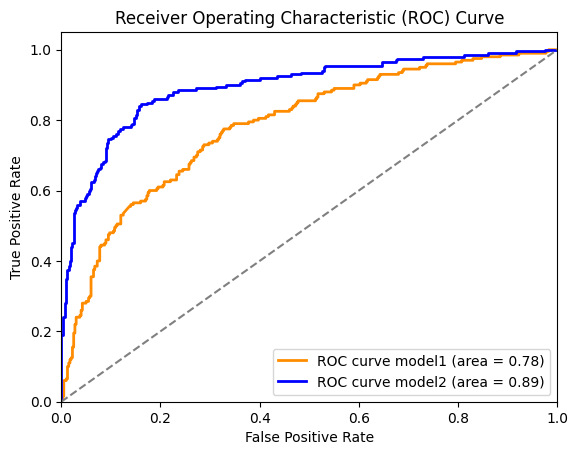

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification

# Generate a sample dataset


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two SVC models with different kernels using OneVsRestClassifier
model1 = OneVsRestClassifier(SVC(probability=True, kernel='linear', random_state=42))
model2 = OneVsRestClassifier(SVC(probability=True, kernel='rbf', random_state=42))

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# Calculate AUC scores for multiclass classification using 'ovr' (one-vs-rest) strategy
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovr')

print("AUC Score for model1:", auc_score1)
print("AUC Score for model2:", auc_score2)

# Plot ROC curve for one-vs-rest for each class
fpr1, tpr1, _ = roc_curve(y_test.ravel(), pred_prob1.ravel())
fpr2, tpr2, _ = roc_curve(y_test.ravel(), pred_prob2.ravel())

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve model1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve model2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# Calculate AUC scores for multiclass classification using 'ovr' (one-vs-rest) strategy
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovr')

print("AUC Score for model1:", auc_score1)
print("AUC Score for model2:", auc_score2)

# Plot ROC curve for one-vs-rest
fpr1, tpr1, _ = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob2[:, 1], pos_label=1)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve model1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve model2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

In [ ]:
pip install flask

In [ ]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file, protocol=4)

In [ ]:
with open('svm_model.pkl', 'rb') as file:
    rf_model_loaded = pickle.load(file)

In [ ]:
score = rf_model_loaded.score(X_test,y_test)
score

0.47706422018348627

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')